In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from nn_magnetics.dataset import ChiMode, get_data_parallel
from nn_magnetics.model import CorrectionLoss, Network
from nn_magnetics.plotting import plot_heatmaps, plot_histograms
from nn_magnetics.train import validate

In [21]:
model = Network(
    in_features=7,
    hidden_dim_factor=6,
    out_features=3,
    activation=F.silu,
)
model.load_state_dict(
    torch.load(
        "../results/revived-pond-21/weights.pt",
        weights_only=True,
    )
)

<All keys matched successfully>

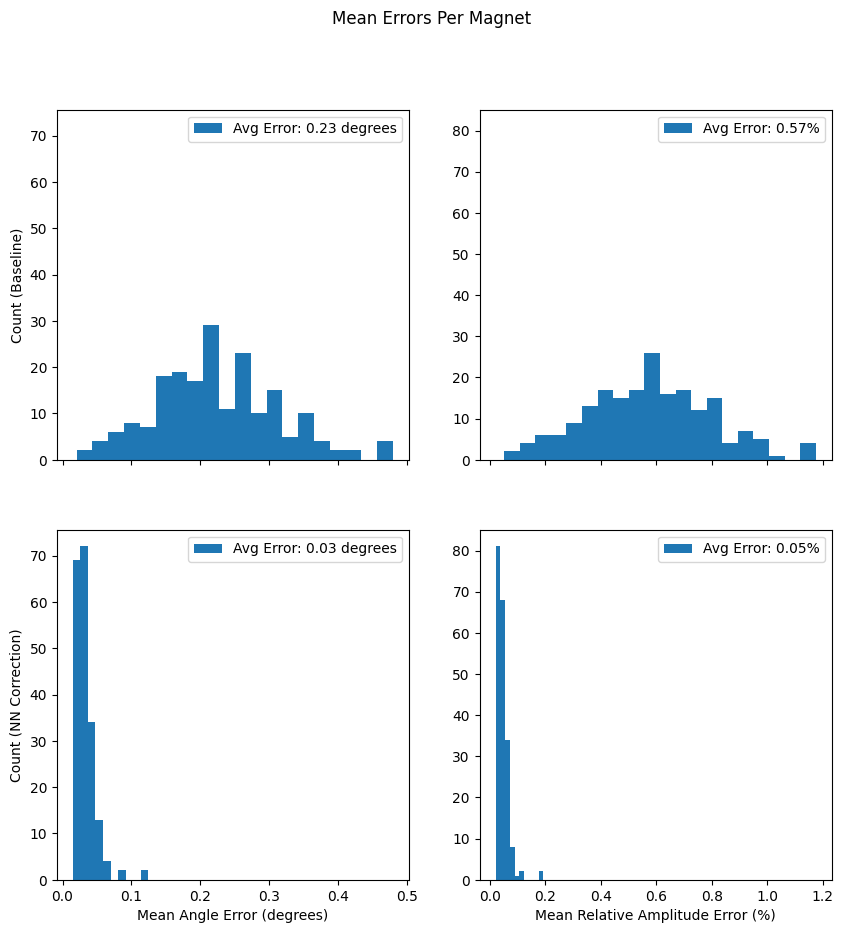

In [22]:
X_test, B_test = get_data_parallel(
    "../data/anisotropic_chi/test_anisotropic", ChiMode.ANISOTROPIC
)
criterion = CorrectionLoss()
val_stats = validate(X_test, B_test, model, criterion)
plot_histograms(val_stats, save_path=None, show_plot=True, tag="isotropic")

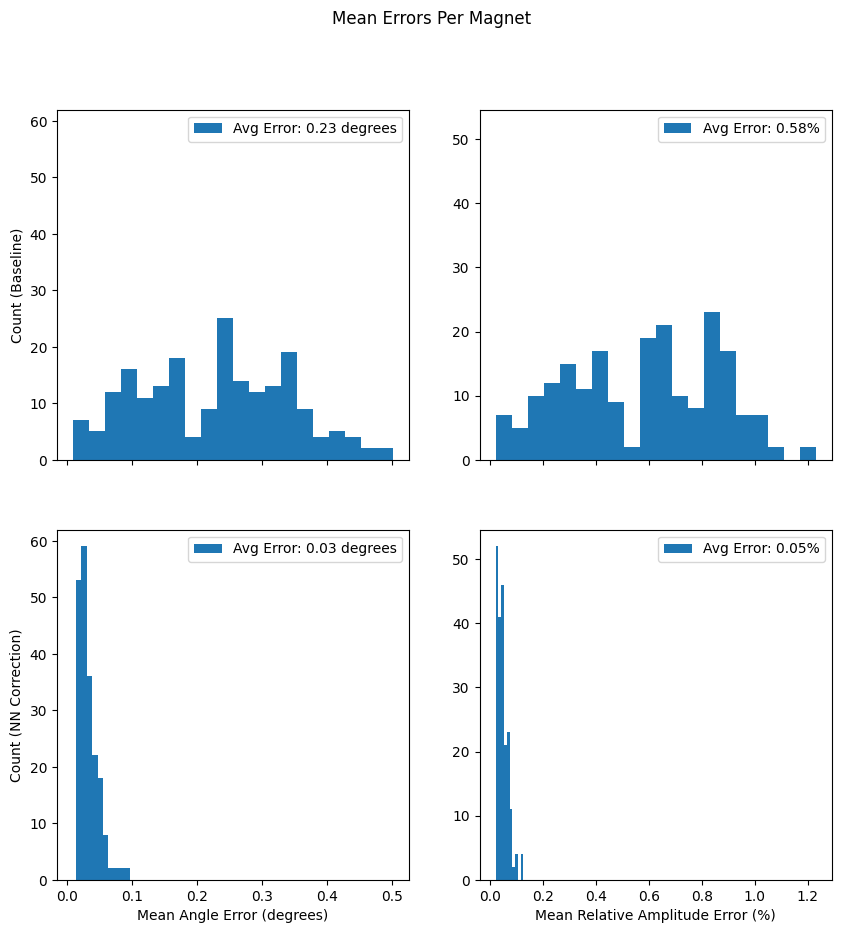

In [23]:
X_test, B_test = get_data_parallel(
    "../data/anisotropic_chi/test_isotropic", ChiMode.ANISOTROPIC
)
criterion = CorrectionLoss()
val_stats = validate(X_test, B_test, model, criterion)
plot_histograms(val_stats, save_path=None, show_plot=True, tag="isotropic")

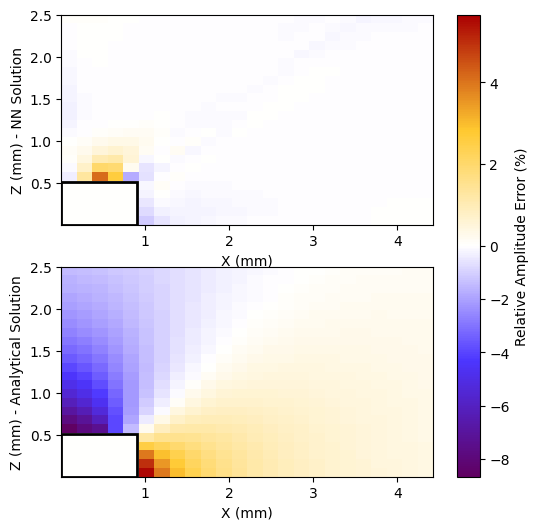

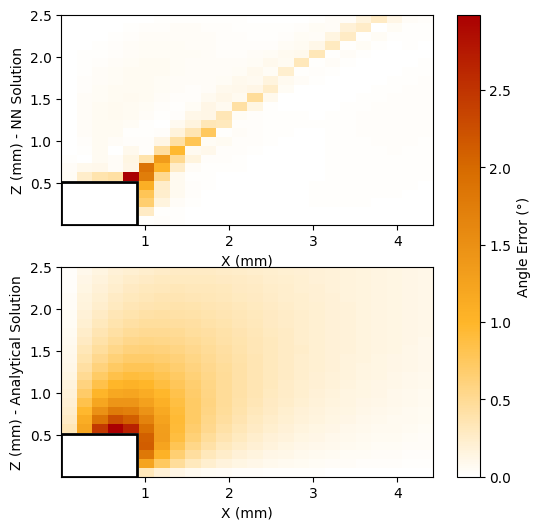

In [24]:
plot_heatmaps(
    model,
    save_path=None,
    tag="done",
    eval_path="../data/anisotropic_chi/test_isotropic/data_1.npz",
)